In [1]:
import eds
import simpy
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import show as sh

In [2]:
clear all

In [3]:
df=pd.read_csv('Prepro/Test-Data',index_col='Unnamed: 0')

In [4]:
sectors=df['PCI Serving'].unique()

In [5]:
cluster=[775,133]

In [6]:
#check if the number of users (positions) for the serving pci is >10
df_f=df.groupby('PCI Serving')
count=0
for i in cluster:
    k=df_f.get_group(i)
    if(len(k)<10):
        cluster=np.delete(cluster,count) #delete cells with less than 10 positions
        df=df[df['PCI Serving']!=i]
    count+=1

In [7]:
env = simpy.rt.RealtimeEnvironment()
thr=6.2
df_filter=df.groupby('PCI Serving')
ue_dict={}
for i in cluster:
    counter=0
    ue_list=np.array([])
    df2=df_filter.get_group(i) 
    #convert dataframe into data format that fits the EDS 
    for j in df2.index:
        ue_list=np.append(ue_list, eds.ue(df.loc[j]['JT_1 SINR [dB]'],df.loc[j]['JT_2 SINR [dB]'],df.loc[j]['PCI Serving'],df.loc[j]['PCI Coord'],env,0, thr,j))
    ue_dict[i]= ue_list

In [8]:
ue_dict_red={}
for i in [775,133]:
    liste=np.array([])
    for j in ue_dict[i]:
        if(i==775):
            if(j.cell2==133):
                liste=np.append(liste,j)
        elif(i==133):
            if(j.cell2==775):
                liste=np.append(liste,j)
    ue_dict_red.update({i:liste})
ue_dict_red2={}
for i in [775,133]:
    ue_dict_red2[i]=ue_dict_red[i][0:10]

In [57]:
max_prb=50
ue_nr=10
metric=[1,1]
size=4000
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict_red2[i])

prb_number_comp=round(eds.calculate_prb_number(ue_all,max_prb)/1.4)
prb_number_normal=max_prb-prb_number_comp


In [58]:
ue_all

array([<eds.ue object at 0x00000264C8726F40>,
       <eds.ue object at 0x00000264C8752AC0>], dtype=object)

In [59]:
env=simpy.Environment()
#Start processes
   
SCHEDULE_T=2 #Clock des Schedulers 
for i in cluster:
    ue_list=ue_dict_red2[i]
    for j in ue_list:
        env.process(j.best_effort(env,size))
        
ue_comp=np.array([]) #ues that use comp -> processed by central_scheduler
for i in cluster:
    ue_list=ue_dict_red2[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,cluster,prb_number_comp,metric))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_sep=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_sep,SCHEDULE_T,cluster,max_prb,ue_list,prb_number_normal,metric))
    counter=counter+1
env.run(until=3000)

mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit Co

C:\Users\Caroline Zoll\EDS\eds.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:211: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))



mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit C

mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit Co

mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit CoMP - v2
mit Co

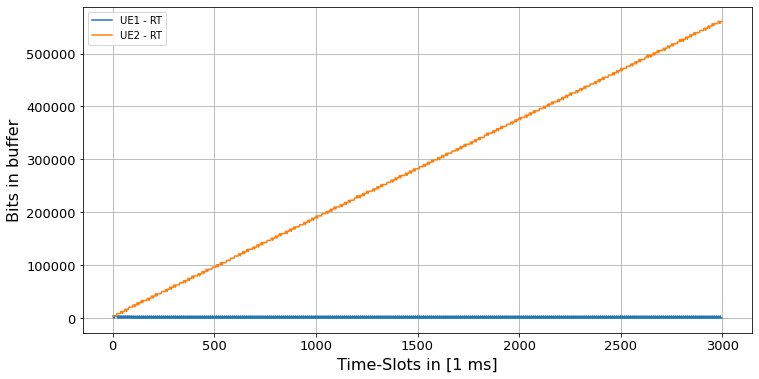

In [60]:
plt.figure(figsize=(12,6))
plt.plot(list(ue_all[2].mon.keys()),list(ue_all[2].mon.values()),label='UE1 - RT')
plt.plot(list(ue_all[7].mon.keys()),list(ue_all[7].mon.values()),label='UE2 - RT')
plt.xlabel('Time-Slots in [1 ms]')
plt.ylabel('Bits in buffer')
plt.legend(loc="upper left")
plt.grid()

In [61]:
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict_red2[i]) 

No handles with labels found to put in legend.


CoMP-gain 1.1078992242992982
10% Quantil: -21.445571414453696
90% Quantil: 55.57165915597684
50% Quantil (Median): -0.04375205357193268


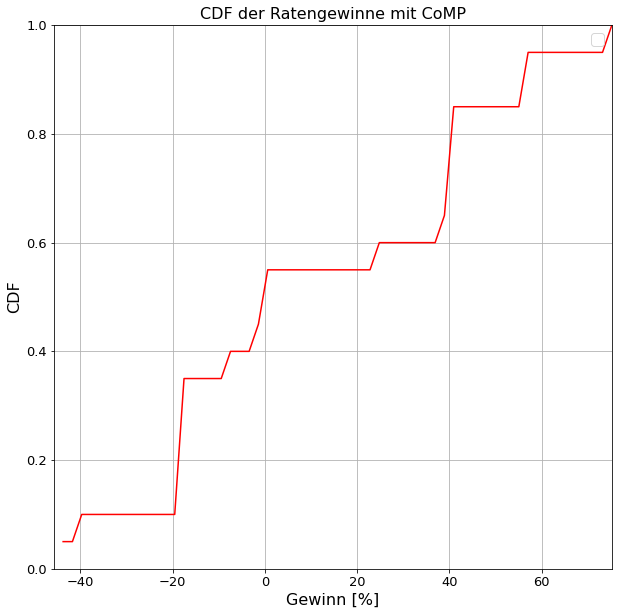

In [62]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
av=av/(ue_nr*2)
print('CoMP-gain',av)

sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)

In [50]:
for i in ue_all:
    #print(i.comp)
    #print(i.tbs2/i.tbs)
    print('Q1')
    print(i.queue.level)
    print('Q2')
    print(i.queue2.level)
    print(i.comp)

Q1
0.0
Q2
0.0
0
Q1
0
Q2
0.0
0
Q1
0
Q2
0.0
0
Q1
0
Q2
0
0
Q1
0.0
Q2
0.0
1
Q1
0
Q2
0.0
0
Q1
0.0
Q2
0.0
1
Q1
0.0
Q2
0.0
1
Q1
0.0
Q2
0.0
1
Q1
0.0
Q2
0.0
0
Q1
0.0
Q2
0.0
1
Q1
195290.0
Q2
0.0
1
Q1
0.0
Q2
0.0
1
Q1
0.0
Q2
67200.0
0
Q1
0.0
Q2
76200.0
0
Q1
0.0
Q2
49200.0
0
Q1
0.0
Q2
125542.5
0
Q1
813550.0
Q2
0.0
1
Q1
0.0
Q2
43800.0
0
Q1
386070.0
Q2
0.0
1
